In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


## **Libraries**

In [1]:
import os
from os import listdir
import pandas as pd
import seaborn as sb
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

import cv2
import glob
import random
import numpy as np
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import pickle

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, MaxPool2D , Flatten, Dense, Activation, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from keras.callbacks import ModelCheckpoint, EarlyStopping 
#ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model
#EarlyStopping helps us to stop the training of the model early 
    #if there is no increase in the parameter which I have set to monitor in EarlyStopping.


import warnings
warnings.filterwarnings("ignore")

In [2]:
directory_root = '/content/drive/My Drive/Semester 3/3406-AIML Capstone/Mendeley/X-ray/'
default_image_size = tuple((256, 256))

## **Visualization**

In [3]:
#dir_prefix = "COVID-19_Dataset/X-ray/Negative/"
def visualize_XRays(label_folder, directory_root):
  rows = 1
  columns = 6
  count = 1
  print('Visualizing Covid:',label_folder)
  covid_folder_list = listdir(f"{directory_root}/{label_folder}") 
  for image in covid_folder_list: # Execute Negative & Positive folder
    if count>rows*columns:
      break
    image_directory = f"{directory_root}/{label_folder}/{image}"
    fig.add_subplot(rows, columns, count)
    count+=1
    Image = cv2.imread(image_directory)
    plt.imshow(Image, cmap=plt.cm.bone)

In [4]:
root_dir = listdir(f"{directory_root}")

Visualizing Covid: Negative


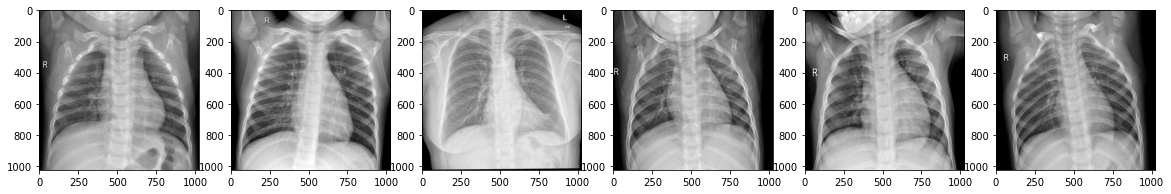

In [5]:
fig = plt.figure(figsize=(20, 10))

visualize_XRays(root_dir[0],directory_root)

Visualizing Covid: Positive


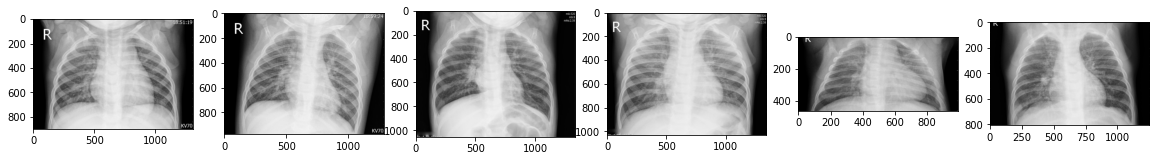

In [6]:
fig = plt.figure(figsize=(20, 10))

visualize_XRays(root_dir[1],directory_root)

## **Processing Image data & setting label**

In [7]:
#Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print("Error :",e)
        return None

In [8]:
image_list, label_list = [], []
count = 0 
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for label_folder in root_dir:
        covid_folder_list = listdir(f"{directory_root}/{label_folder}") 
        print("Processing:",label_folder)
        for image in covid_folder_list[:1000]: # Execute Negative & Positive folder
            count+=1
            #print(f"[INFO] Processing {image} ...")
            #print(label_folder)
            image_directory = f"{directory_root}/{label_folder}/{image}"
            #if image_directory.endswith(".JPG") == True or image_directory.endswith(".JPEG") == True or image_directory.endswith(".PNG") == True or image_directory.endswith(".png") == True:
            image_list.append(convert_image_to_array(image_directory))
            label_list.append(label_folder)
    
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Processing: Negative
Processing: Positive
[INFO] Image loading completed


In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [10]:
print(label_binarizer.classes_)

['Negative' 'Positive']


In [11]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [12]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels,
                                                    test_size=0.2, random_state = 42, shuffle=True) 

[INFO] Spliting data to train, test


In [13]:
# Our vectorized labels
# y_train = np.asarray(y_train).astype('int').reshape((-1,1))
# y_test = np.asarray(y_test).astype('int').reshape((-1,1))

In [14]:
print(x_train.shape, y_train.shape, '\n',x_test.shape, y_test.shape)

(1600, 256, 256, 3) (1600, 1) 
 (400, 256, 256, 3) (400, 1)


In [15]:
aug = ImageDataGenerator(
    rotation_range=0,#25, 
    width_shift_range=0.0,#0.1,
    height_shift_range=0.0,#0.1, 
    shear_range=0.0,#0.2, 
    zoom_range=0.0,#0.2,
    horizontal_flip=False,#True, 
    fill_mode="nearest")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


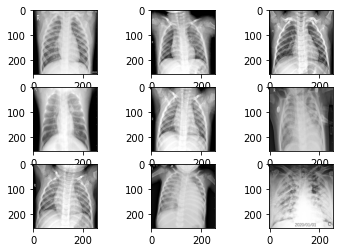

In [16]:
# fit parameters from data
aug.fit(x_train)

# Configure batch size and retrieve one batch of images
for x_batch, y_batch in aug.flow(x_train, y_train, batch_size=32):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i])
    # show the plot
    plt.show()
    break

In [17]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
#image_size = 0
width=256
height=256
depth=3

### **VGG16 model**

In [18]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(input_shape=inputShape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="softmax"))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

In [21]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", 
              optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

warnings.filterwarnings("ignore")

history_vgg16 = model.fit_generator(aug.flow(x_train,y_train,batch_size=BS),
                                    validation_data= (x_test, y_test),
                                    steps_per_epoch=len(x_train) // BS,
                                    epochs=EPOCHS,
                                    verbose=1,callbacks=[checkpoint,early])


Epoch 1/25
50/50 [==============================] - 28s 555ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 2/25
50/50 [==============================] - 28s 568ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 3/25
50/50 [==============================] - 28s 551ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 4/25
50/50 [==============================] - 28s 551ms/step - loss: 0.6931 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 5/25
50/50 [==============================] - 28s 557ms/step - loss: 0.6931 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 6/25
50/50 [==============================] - 28s 555ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 7/25
50/50 [==============================] - 28s 553ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5025

## **Custom model**

In [18]:
model_custom = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model_custom.add(Conv2D(32, (3, 3), padding="same",activation="relu",input_shape=inputShape, strides=(1,1)))
model_custom.add(BatchNormalization(axis=chanDim))
model_custom.add(MaxPooling2D(pool_size=(3, 3)))
model_custom.add(SpatialDropout2D(0.25))
model_custom.add(Conv2D(64, (3, 3), padding="same",activation="relu", strides=(1,1)))
model_custom.add(BatchNormalization(axis=chanDim))
model_custom.add(Conv2D(64, (3, 3), padding="same",activation="relu", strides=(1,1)))
model_custom.add(BatchNormalization(axis=chanDim))
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(SpatialDropout2D(0.25))
model_custom.add(Conv2D(128, (3, 3), padding="same",activation="relu", strides=(1,1)))
model_custom.add(BatchNormalization(axis=chanDim))
model_custom.add(Conv2D(128, (3, 3), padding="same",activation="relu", strides=(1,1)))
model_custom.add(BatchNormalization(axis=chanDim))
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(SpatialDropout2D(0.25))
model_custom.add(Flatten())
model_custom.add(Dense(1024, activation="relu"))
model_custom.add(BatchNormalization())
model_custom.add(Dropout(0.5))
model_custom.add(Dense(1,activation="sigmoid" ))

In [19]:
model_custom.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 85, 85, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        3

In [20]:
from keras.optimizers import SGD
opt = SGD(lr=INIT_LR)
model_custom.compile(loss ="binary_crossentropy",
              optimizer = opt,metrics=["accuracy"])

In [21]:
# summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
#   if 'conv' not in layer.name:
# 		continue;
# 	# get filter weights
# 	filters, biases = layer.get_weights()
# 	print(layer.name, filters.shape)

In [22]:
print(x_test.shape, x_train.shape)

(400, 256, 256, 3) (1600, 256, 256, 3)


In [23]:
# checkpoint = ModelCheckpoint("/content/drive/My Drive/Semester 3/3406-AIML Capstone/Mendeley/custom.h5", 
#                              monitor='val_acc', 
#                              verbose=1, save_best_only=True, 
#                              save_weights_only=False, mode='auto', period=1)

# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model_custom.fit_generator(aug.flow(x_train,y_train,batch_size=BS),
                                     validation_data= (x_test, y_test),
                                     steps_per_epoch=len(x_train) // BS,
                                     epochs=EPOCHS,
                                     verbose=1)#,callbacks=[checkpoint,early])

Epoch 1/25
50/50 [==============================] - 39s 117ms/step - loss: 0.6114 - accuracy: 0.7419 - val_loss: 0.9393 - val_accuracy: 0.5025
Epoch 2/25
50/50 [==============================] - 5s 96ms/step - loss: 0.4848 - accuracy: 0.8100 - val_loss: 1.3243 - val_accuracy: 0.5025
Epoch 3/25
50/50 [==============================] - 5s 96ms/step - loss: 0.4548 - accuracy: 0.8263 - val_loss: 1.6579 - val_accuracy: 0.5025
Epoch 4/25
50/50 [==============================] - 5s 96ms/step - loss: 0.3749 - accuracy: 0.8450 - val_loss: 1.8364 - val_accuracy: 0.5025
Epoch 5/25
50/50 [==============================] - 5s 97ms/step - loss: 0.4243 - accuracy: 0.8537 - val_loss: 1.9120 - val_accuracy: 0.5025
Epoch 6/25
50/50 [==============================] - 5s 96ms/step - loss: 0.3438 - accuracy: 0.8562 - val_loss: 1.7944 - val_accuracy: 0.5025
Epoch 7/25
50/50 [==============================] - 5s 98ms/step - loss: 0.3485 - accuracy: 0.8712 - val_loss: 1.6604 - val_accuracy: 0.5025
Epoch 8/25


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()